Myr = 205 View = 0


<Figure size 432x288 with 0 Axes>

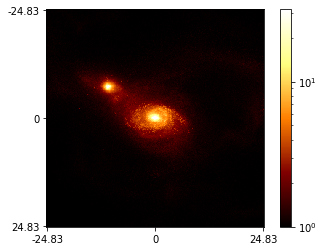

Myr = 205 View = 1


<Figure size 432x288 with 0 Axes>

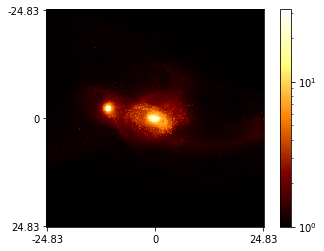

Myr = 205 View = 2


<Figure size 432x288 with 0 Axes>

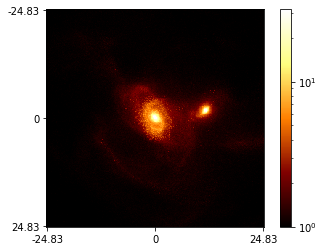

Myr = 205 View = 3


<Figure size 432x288 with 0 Axes>

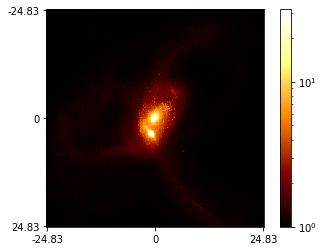

Myr = 205 View = 4


<Figure size 432x288 with 0 Axes>

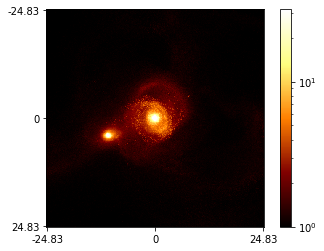

Myr = 205 View = 5


<Figure size 432x288 with 0 Axes>

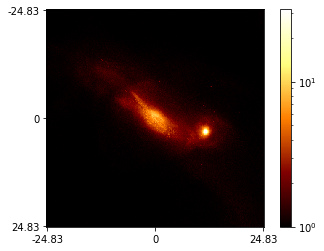

Myr = 205 View = 6


<Figure size 432x288 with 0 Axes>

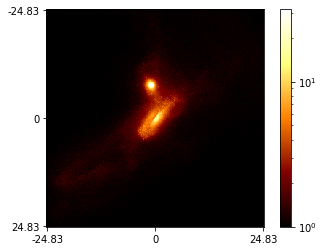

In [43]:
# My new idea is to use one spaxel, an also to use a stellar template if necessary.
import pyfits
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.cosmology import WMAP9 as cosmo
import matplotlib

import os
myr=205
view_list=[0,1,2,3,4,5,6]
run='fg3_m12'
for p in range(len(view_list)):
    small=0
    broadband=0
    broadband_r=0
    view = view_list[p]
    
    print('Myr = '+str(myr)+' View = '+str(view))
    

    # Import the broadband image too
    if myr==5:
        prefix = 'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'
        print(os.getcwd())
        im = pyfits.open(prefix)
    if myr==60:
        prefix = 'q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_060.fits'
        print(os.getcwd())
        im = pyfits.open(prefix)
    if myr==205:
        im = pyfits.open('q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_'+str(myr)+'.fits')
    image = im['CAMERA'+str(view)+'-BROADBAND'].data
    
    broadband = image[0]#[2]
    broadband_r = image[2]
    
    z = 0.03
    
    
    kpc_arcmin=cosmo.kpc_proper_per_arcmin(0.03)
    pixelscale = im['CAMERA'+str(view)+'-BROADBAND'].header['CD1_1']
    plt.clf()
    fig = plt.figure()
    ax0 = fig.add_subplot(111)
    im0 = ax0.imshow(abs(broadband_r)+1, cmap='afmhot', norm=matplotlib.colors.LogNorm(vmax=10**1.5))
    plt.colorbar(im0)
    ax0.set_xticks([0+1, np.shape(broadband_r)[0]/2, np.shape(broadband_r)[0]-1])
    ax0.set_yticks([0+1, np.shape(broadband_r)[0]/2, np.shape(broadband_r)[0]-1])
    ax0.set_xticklabels([round(-(np.shape(broadband_r)[0]/2-1)*pixelscale,2),0,round((np.shape(broadband_r)[0]/2-1)*pixelscale,2)])
    ax0.set_yticklabels([round(-(np.shape(broadband_r)[0]/2-1)*pixelscale,2),0,round((np.shape(broadband_r)[0]/2-1)*pixelscale,2)])
    
    plt.show()
    

31 31
doing this one in the image 5 0.05
looking in hires_kin_early_cen1
doing this one in the image 20 0.2
looking in hires_kin_early_cen1
doing this one in the image 40 0.39
looking in hires_kin_early_cen1
doing this one in the image 80 0.78
looking in hires_kin_early_cen1
doing this one in the image 120 1.17
looking in hires_kin_early_cen1
doing this one in the image 160 1.56
looking in hires_kin_early_cen1
doing this one in the image 185 1.81
doing this one in the image 195 1.91
uh oh
doing this one in the image 210 2.05
doing this one in the image 225 2.2
doing this one in the image 240 2.35
doing this one in the image 260 2.54
doing this one in the image 275 2.69
uh oh
doing this one in the image 295 3.62


<Figure size 432x288 with 0 Axes>

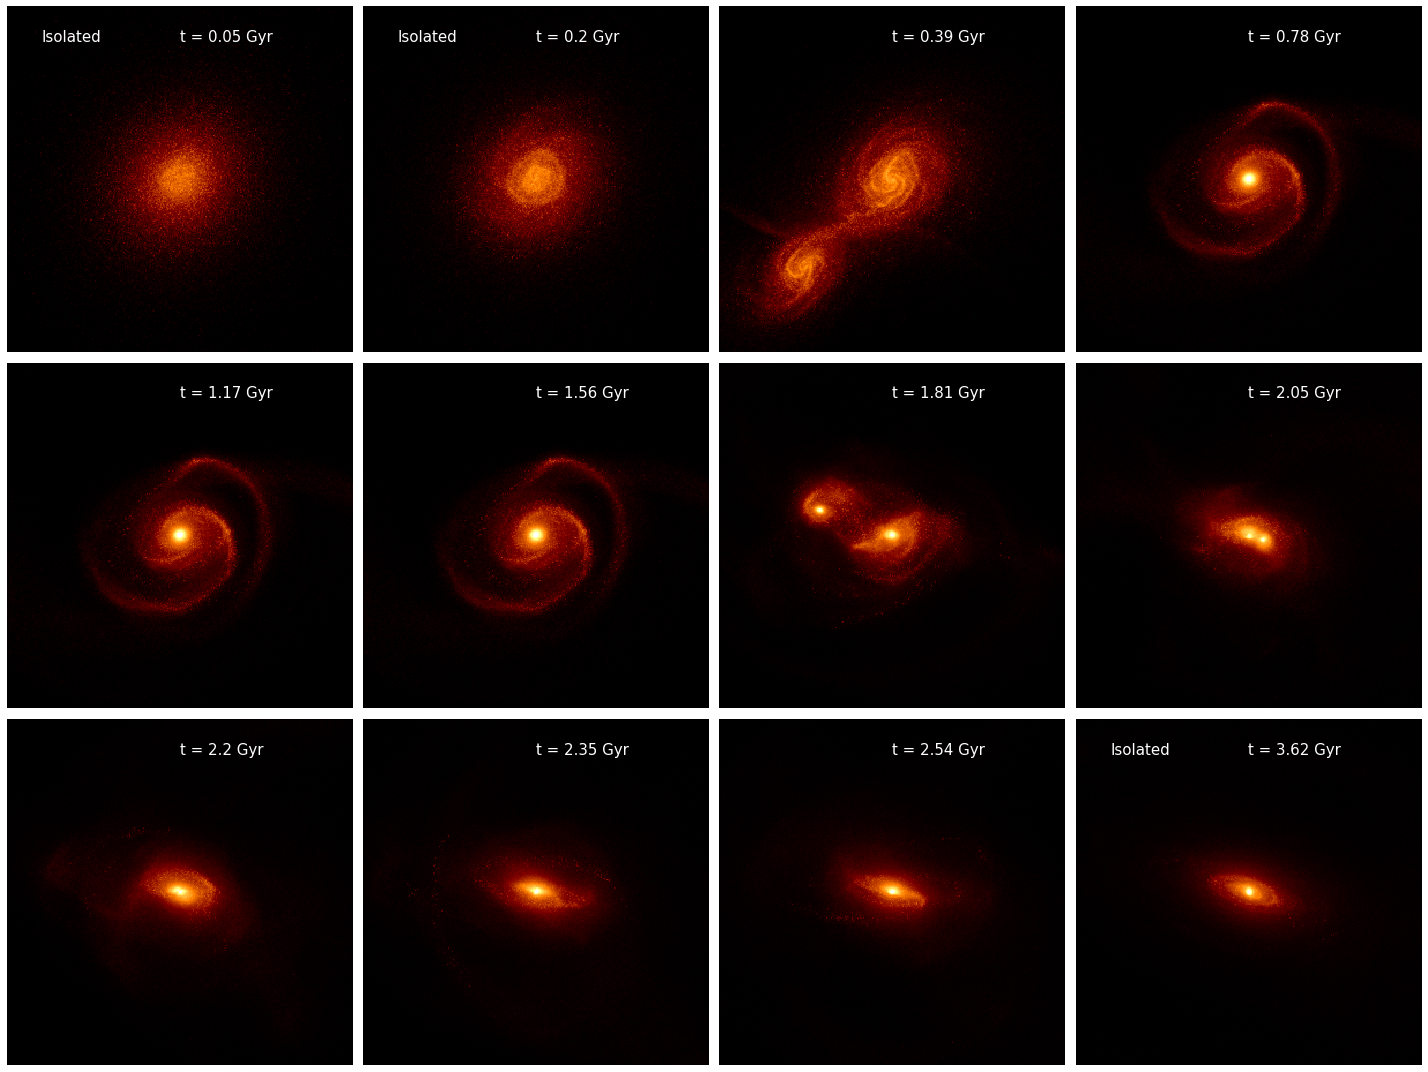

In [62]:
myr=[5,10,20,30,40,60,80,100,120,140,160,180,185, 190, 195, 205, 
     210, 220, 225, 230, 240, 250, 260,
     265,275,285,295,305,311,315,320]
myr_actual= [0.05,0.1,0.2,0.29,0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 
             1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 
             2.35, 2.44, 2.54, 2.59, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]
       

#myr [0.29, 0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
#myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]
#myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, ]
#myr_actual=[]
viewpoint=0

plt.clf()
fig, axs = plt.subplots(3,4, figsize=(20, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.1)
print(len(myr_actual), len(myr))

axs = axs.ravel()

multiple=2
plot_i=0
for i in range(14):#12
    broadband_r=0
    print('doing this one in the image', myr[multiple*i], myr_actual[multiple*i])
    if myr_actual[multiple*i]==1.86 or myr_actual[multiple*i]==1.91 or myr_actual[multiple*i]==2.69:
        continue
    else:
        if myr[multiple*i]<170:
            print('looking in hires_kin_early_cen1')
            if myr[multiple*i] < 10:
                im = pyfits.open('q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_00'+str(myr[multiple*i])+'.fits')
            else:
                if myr[multiple*i] < 100:
                    im = pyfits.open('q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_0'+str(myr[multiple*i])+'.fits')
        else:
            im = pyfits.open('q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_'+str(myr[multiple*i])+'.fits')
        image = im['CAMERA'+str(viewpoint)+'-BROADBAND'].data

        
        broadband = image[0]#[2]
        broadband_r = image[2]
        axs[plot_i].imshow(abs(broadband_r)+1,norm=matplotlib.colors.LogNorm(vmin=10**(0), vmax=10**2),cmap='afmhot')
        axs[plot_i].annotate(r't = '+str(round(myr_actual[multiple*i],2))+' Gyr', xy=(0.5,0.9), color='white', xycoords='axes fraction', size=15)
        if myr_actual[multiple*i] < 0.39 or myr_actual[multiple*i] > 2.15+0.5:
            axs[plot_i].annotate(r'Isolated', xy=(0.1,0.9), color='white', xycoords='axes fraction', size=15)

        axs[plot_i].axis('off')
        plot_i+=1
        
        '''plt.clf()
        plt.imshow(abs(file[0].data),norm=matplotlib.colors.LogNorm(vmin=10**(-2), vmax=10**5),cmap='afmhot')
        plt.colorbar(im)
        plt.show()
        STOP'''
#plt.show()  
plt.tight_layout()
plt.savefig('mosaic_real.png', dpi=1000)